## Pandas Intro

*Pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.*

Python has long been great for data munging and preparation, but less so for data analysis and modeling. pandas helps fill this gap, enabling you to carry out your entire data analysis workflow in Python without having to switch to a more domain specific language like R.

* A fast and efficient **DataFrame object** for data manipulation with integrated indexing;
* Tools for reading and writing data between in-memory data structures and different formats: CSV and text files, Microsoft Excel, SQL databases, and the fast HDF5 format;
* Intelligent data alignment and integrated handling of missing data: gain automatic label-based alignment in computations and easily manipulate messy data into an orderly form;
* Flexible reshaping and pivoting of data sets;
* Intelligent label-based slicing, fancy indexing, and subsetting of large data sets;
* Columns can be inserted and deleted from data structures for size mutability;
* Aggregating or transforming data with a powerful group by engine allowing split-apply-combine operations on data sets;
* High performance merging and joining of data sets;
* Hierarchical axis indexing provides an intuitive way of working with high-dimensional data in a lower-dimensional data structure;
* Time series-functionality: date range generation and frequency conversion, moving window statistics, moving window linear regressions, date shifting and lagging. Even create domain-specific time offsets and join time series without losing data;
* Highly optimized for performance, with critical code paths written in Cython or C.
* Python with pandas is in use in a wide variety of academic and commercial domains, including Finance, Neuroscience, Economics, Statistics, Advertising, Web Analytics, and more.

## Let's Get Started

Below is a code snippet that sets plotting styles and imports libraries

In [2]:
# The usual preamble
%matplotlib inline
# import folium
import pandas as pd
import matplotlib.pyplot as plt

# Make the graphs a bit prettier, and bigger
# pd.set_option('display.mpl_style', 'default')
plt.style.use('ggplot')

# This is necessary to show lots of columns in pandas 0.12. 
# Not necessary in pandas 0.13.
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

plt.rcParams['figure.figsize'] = (15, 5)

We're going to use a dataset from Foursquare that contains all of the coffee shops within NCR.

In [3]:
# This assigns the coffeeshops data to a dataframe object that maps to the "df" variable
df = pd.read_csv("coffeeshops.csv")

## What's in the Data?

When you print a large dataframe, it will only show you the first few rows.
If you don't see this, don't panic! The default behavior for large dataframes changed between pandas 0.12 and 0.13. Previous to 0.13 it would show you a summary of the dataframe. This includes all the columns, and how many non-null values there are in each column.

In [4]:
# Invoking the variable you assigned to the dataframe prints the dataframe for visual perusal
df

,id,name,lat,lng,checkins,address
0,4b78d398f964a520cee32ee3,Starbucks Coffee,14.734710,121.057599,10428,"Ground Flr, SM City Fairview (Annex 1)"
1,53055beb498e87041e7204f9,Starbucks Coffee,14.735735,121.060213,3793,"Fairview Terraces, Quirino Hwy"
2,4bc1f1a6f8219c74a0f7b310,The Coffee Bean & Tea Leaf,14.736308,121.058135,17441,"G/F Gateway Mall, Gen Roxas Ave"
3,4e5b077352b1b78b81b213b9,Starbucks Coffee,14.734639,121.059474,4116,"2nd Flr, SM City Fairview (Main Bldg)"
4,4ceb3522e888f04d2161516b,Starbucks Coffee,14.553593,121.050662,40149,"Crossroads, Bonifacio Global City"
...,...,...,...,...,...,...
4779,4e5b116c1fc7864a236ad263,Island Cove Cafe,14.461314,120.922271,164,Island Cove Resort and Leisure Park
4780,4e0c6434aeb7af850d68112c,Cafe Agnes,14.617451,121.099672,117,Sta. Lucia East Grand mall
4781,4eef1691722ea77619855ccd,Fior Cafe 3rd Level SM North Edsa,14.656303,121.032326,153,SM City North EDSA
4782,4fe2debbe4b044a5595e6d76,RawMatters Café,14.644213,121.027300,132,53 West Ave


Kinda overwhelming huh? You can "non-statistically" sample the dataset for a quick preview by using the `head` command.

In [7]:
df.head()

,id,name,lat,lng,checkins,address
0,4b78d398f964a520cee32ee3,Starbucks Coffee,14.734710,121.057599,10428,"Ground Flr, SM City Fairview (Annex 1)"
1,53055beb498e87041e7204f9,Starbucks Coffee,14.735735,121.060213,3793,"Fairview Terraces, Quirino Hwy"
2,4bc1f1a6f8219c74a0f7b310,The Coffee Bean & Tea Leaf,14.736308,121.058135,17441,"G/F Gateway Mall, Gen Roxas Ave"
3,4e5b077352b1b78b81b213b9,Starbucks Coffee,14.734639,121.059474,4116,"2nd Flr, SM City Fairview (Main Bldg)"
4,4ceb3522e888f04d2161516b,Starbucks Coffee,14.553593,121.050662,40149,"Crossroads, Bonifacio Global City"


Not enough of a preview? You can use `df.head(10)` to get more rows displayed.

In [16]:
df.head(10)

,id,name,lat,lng,checkins,address
0,4b78d398f964a520cee32ee3,Starbucks Coffee,14.734710,121.057599,10428,"Ground Flr, SM City Fairview (Annex 1)"
1,53055beb498e87041e7204f9,Starbucks Coffee,14.735735,121.060213,3793,"Fairview Terraces, Quirino Hwy"
2,4bc1f1a6f8219c74a0f7b310,The Coffee Bean & Tea Leaf,14.736308,121.058135,17441,"G/F Gateway Mall, Gen Roxas Ave"
3,4e5b077352b1b78b81b213b9,Starbucks Coffee,14.734639,121.059474,4116,"2nd Flr, SM City Fairview (Main Bldg)"
4,4ceb3522e888f04d2161516b,Starbucks Coffee,14.553593,121.050662,40149,"Crossroads, Bonifacio Global City"
5,5312cb21498e14478618f0b1,Seattle's Best Coffee,14.737156,121.059300,1228,"Fairview Terraces, Quirino Hwy"
6,4dd26268cc3f7f8c122e7e1e,Starbucks Coffee,14.552860,121.025119,28782,"Ground Flr, 6750 Ayala Tower, 6750 Ayala Ave"
7,4f7b3de0e4b03c16c03f9e29,Starbucks Coffee,14.680479,121.031785,18986,St. Charbel St
8,4b71144cf964a52029392de3,Starbucks Coffee,14.630510,121.034510,28172,212 Tomas Morato Ave
9,52b91335498e393e561ad5b1,Starbucks Coffee,14.574494,121.062474,11133,"Unit R1, Capitol Commons, Shaw Blvd., Pasig City"


You can figure out what data types the columns are by using the `dtypes` function.

In [17]:
df.dtypes

id           object
name         object
lat         float64
lng         float64
checkins      int64
address      object
dtype: object

## Selecting Columns and Rows

To select a column, we index with the name of the column and but it in double brackets, like this:

In [20]:
df[["name", "lat", "lng"]]

,name,lat,lng
0,Starbucks Coffee,14.734710,121.057599
1,Starbucks Coffee,14.735735,121.060213
2,The Coffee Bean & Tea Leaf,14.736308,121.058135
3,Starbucks Coffee,14.734639,121.059474
4,Starbucks Coffee,14.553593,121.050662
...,...,...,...
4779,Island Cove Cafe,14.461314,120.922271
4780,Cafe Agnes,14.617451,121.099672
4781,Fior Cafe 3rd Level SM North Edsa,14.656303,121.032326
4782,RawMatters Café,14.644213,121.027300


To get the first 5 rows of a dataframe, we can use a slice: `df[:5]`.

This is a great way to get a sense for what kind of information is in the dataframe -- take a minute to look at the contents and get a feel for this dataset.

Sort of the same as head isn't it?

In [23]:
df[:5]

,id,name,lat,lng,checkins,address
0,4b78d398f964a520cee32ee3,Starbucks Coffee,14.734710,121.057599,10428,"Ground Flr, SM City Fairview (Annex 1)"
1,53055beb498e87041e7204f9,Starbucks Coffee,14.735735,121.060213,3793,"Fairview Terraces, Quirino Hwy"
2,4bc1f1a6f8219c74a0f7b310,The Coffee Bean & Tea Leaf,14.736308,121.058135,17441,"G/F Gateway Mall, Gen Roxas Ave"
3,4e5b077352b1b78b81b213b9,Starbucks Coffee,14.734639,121.059474,4116,"2nd Flr, SM City Fairview (Main Bldg)"
4,4ceb3522e888f04d2161516b,Starbucks Coffee,14.553593,121.050662,40149,"Crossroads, Bonifacio Global City"


We can combine these to get the first 5 rows of a column:

In [26]:
df[["name", "lat", "lng"]][:5]

,name,lat,lng
0,Starbucks Coffee,14.734710,121.057599
1,Starbucks Coffee,14.735735,121.060213
2,The Coffee Bean & Tea Leaf,14.736308,121.058135
3,Starbucks Coffee,14.734639,121.059474
4,Starbucks Coffee,14.553593,121.050662


It doesn't even matter what direction we do it in:

In [27]:
df[:5].head()

,id,name,lat,lng,checkins,address
0,4b78d398f964a520cee32ee3,Starbucks Coffee,14.734710,121.057599,10428,"Ground Flr, SM City Fairview (Annex 1)"
1,53055beb498e87041e7204f9,Starbucks Coffee,14.735735,121.060213,3793,"Fairview Terraces, Quirino Hwy"
2,4bc1f1a6f8219c74a0f7b310,The Coffee Bean & Tea Leaf,14.736308,121.058135,17441,"G/F Gateway Mall, Gen Roxas Ave"
3,4e5b077352b1b78b81b213b9,Starbucks Coffee,14.734639,121.059474,4116,"2nd Flr, SM City Fairview (Main Bldg)"
4,4ceb3522e888f04d2161516b,Starbucks Coffee,14.553593,121.050662,40149,"Crossroads, Bonifacio Global City"


## Selecting Multiple Columns

What if we just want to know the name of the coffee shop and the number of check-ins, but not the rest of the information? Pandas makes it really easy to select a subset of the columns: just index with list of columns you want.

In [28]:
df[['name', 'checkins']]

,name,checkins
0,Starbucks Coffee,10428
1,Starbucks Coffee,3793
2,The Coffee Bean & Tea Leaf,17441
3,Starbucks Coffee,4116
4,Starbucks Coffee,40149
...,...,...
4779,Island Cove Cafe,164
4780,Cafe Agnes,117
4781,Fior Cafe 3rd Level SM North Edsa,153
4782,RawMatters Café,132


Again we can either use dataframe slicing like so `[:5]` or use the `head` function to limit what is displayed.

In [29]:
# We can put an n integer inside the head function to print n rows
df[['name', 'checkins']].head(5)

,name,checkins
0,Starbucks Coffee,10428
1,Starbucks Coffee,3793
2,The Coffee Bean & Tea Leaf,17441
3,Starbucks Coffee,4116
4,Starbucks Coffee,40149


## Basic Data Stats

Okay we've dealt with the access and manipulation of dataframes. Now we get on with the exciting part of getting actual information from our data.

### Coffeeshops with the most branches?

Pandas makes this easy to answer with the `value_counts()` command.

In [32]:
# value_counts() acts like a sort of "GROUP BY COUNT" SQL query
df['address'].value_counts()

Ground Flr, 6750 Ayala Tower, 6750 Ayala Ave       68
Ground Flr, Glorietta 2                            66
Ground Flr, The Podium                             60
Corinthian Hills Clubhouse                         60
Crossroads, Bonifacio Global City                  60
                                                   ..
Village East Avenue                                 2
#28 Molave St. Octagon Village, Brgy Dela Paz       2
Sampaloc, Manila                                    2
Ground Flr, JP Laurel Memorial Bldg, Roxas Blvd     2
U.P. Town Center 2                                  2
Name: address, Length: 300, dtype: int64

In [33]:
df = df.drop_duplicates()

In [34]:
df

,id,name,lat,lng,checkins,address
0,4b78d398f964a520cee32ee3,Starbucks Coffee,14.734710,121.057599,10428,"Ground Flr, SM City Fairview (Annex 1)"
1,53055beb498e87041e7204f9,Starbucks Coffee,14.735735,121.060213,3793,"Fairview Terraces, Quirino Hwy"
2,4bc1f1a6f8219c74a0f7b310,The Coffee Bean & Tea Leaf,14.736308,121.058135,17441,"G/F Gateway Mall, Gen Roxas Ave"
3,4e5b077352b1b78b81b213b9,Starbucks Coffee,14.734639,121.059474,4116,"2nd Flr, SM City Fairview (Main Bldg)"
4,4ceb3522e888f04d2161516b,Starbucks Coffee,14.553593,121.050662,40149,"Crossroads, Bonifacio Global City"
...,...,...,...,...,...,...
4549,4ba4e69ef964a520dac038e3,Starbucks Coffee,14.610225,121.079915,6875,"4th Flr, Eastwood Mall"
4557,4cc412bd3d7fa1cdb2a9a95f,Ghenne's Coffee Shop,14.603783,121.079698,208,Shopwise
4558,4e3758efd164374eb6867059,Dexter's Bakeshop & Coffee Shop,14.612650,121.070580,233,White Plains
4623,573d3faf498e71521269de67,Starbucks Coffee,14.650662,121.075041,698,U.P. Town Center 2


In [35]:
df['address'].value_counts()

NAIA Terminal 3                             3
Ground Flr, Glorietta 5                     2
Ground Flr, Market! Market!                 2
Ground Flr, Circuit Lane, Circuit Makati    2
Katipunan Ave                               2
                                           ..
Matalino St.                                1
Ground Flr, U.P.-Ayala Land Technohub       1
McArthur Hwy, Marulas                       1
SM City Manila                              1
U.P. Town Center 2                          1
Name: address, Length: 300, dtype: int64

In [36]:
df['name'].value_counts()[:10]

Starbucks Coffee                 151
The Coffee Bean & Tea Leaf        31
Seattle's Best Coffee             15
Bo's Coffee                        7
UCC Vienna Café                    6
UCC Café Terrace                   5
J.CO Donuts & Coffee               5
UCC Park Café                      3
Toby's Estate Coffee Roasters      3
D' Cream Coffee & Tea              2
Name: name, dtype: int64

<AxesSubplot:title={'center':'Top 10 Coffeeshops by Number of Branches'}>

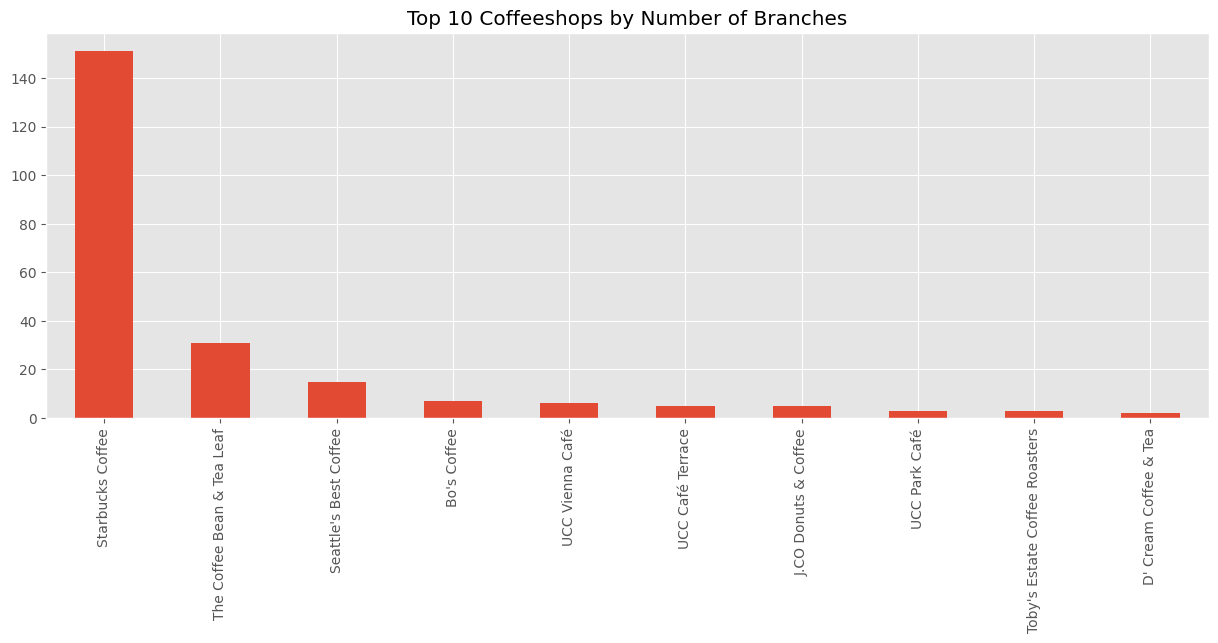

In [41]:
plt.style.use('ggplot')
# This is necessary to show lots of columns in pandas 0.12. 
# Not necessary in pandas 0.13.
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

plt.rcParams['figure.figsize'] = (15, 5)
df['name'].value_counts()[:10].plot(kind='bar', title ="Top 10 Coffeeshops by Number of Branches")

### Average Check-Ins per Coffee Chain?

Pandas allows us to do this with a groupBy function.

In [42]:
df['checkins'].groupby(df['name']).mean().sort_values(ascending=False)[:10]

name
Starbucks Coffee              9673.370861
The Chocolate Kiss Café       8493.000000
Cafe-UK Co.                   8372.000000
The Coffee Bean & Tea Leaf    7704.161290
Blenz Coffee                  5711.000000
Café Xocolat                  5201.000000
J.CO Donuts & Coffee          4820.200000
Seattle's Best Coffee         4546.266667
Mrs. Fields Cafe              4299.000000
Baang Coffee                  4284.000000
Name: checkins, dtype: float64

<AxesSubplot:title={'center':'Top 10 Coffeeshops by Mean Number of Checkins'}, xlabel='name'>

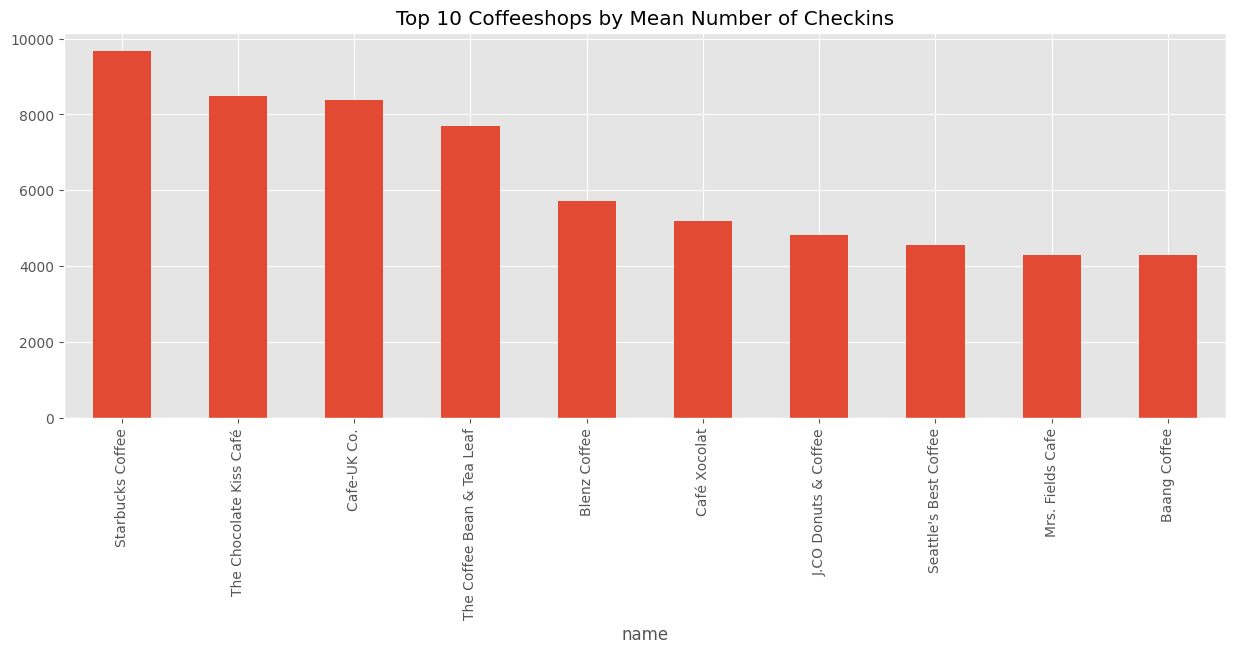

In [44]:
df['checkins'].groupby(df['name']).mean().sort_values(ascending=False)[:10].plot(kind='bar',\
                                                                                 title ="Top 10 Coffeeshops by Mean Number of Checkins")

In [45]:
df

,id,name,lat,lng,checkins,address
0,4b78d398f964a520cee32ee3,Starbucks Coffee,14.734710,121.057599,10428,"Ground Flr, SM City Fairview (Annex 1)"
1,53055beb498e87041e7204f9,Starbucks Coffee,14.735735,121.060213,3793,"Fairview Terraces, Quirino Hwy"
2,4bc1f1a6f8219c74a0f7b310,The Coffee Bean & Tea Leaf,14.736308,121.058135,17441,"G/F Gateway Mall, Gen Roxas Ave"
3,4e5b077352b1b78b81b213b9,Starbucks Coffee,14.734639,121.059474,4116,"2nd Flr, SM City Fairview (Main Bldg)"
4,4ceb3522e888f04d2161516b,Starbucks Coffee,14.553593,121.050662,40149,"Crossroads, Bonifacio Global City"
...,...,...,...,...,...,...
4549,4ba4e69ef964a520dac038e3,Starbucks Coffee,14.610225,121.079915,6875,"4th Flr, Eastwood Mall"
4557,4cc412bd3d7fa1cdb2a9a95f,Ghenne's Coffee Shop,14.603783,121.079698,208,Shopwise
4558,4e3758efd164374eb6867059,Dexter's Bakeshop & Coffee Shop,14.612650,121.070580,233,White Plains
4623,573d3faf498e71521269de67,Starbucks Coffee,14.650662,121.075041,698,U.P. Town Center 2


### Plotting the coffee shop locations

We have coordinate data! Why don't we plot them out? Pandas is able to do this with the help of a mapping library called Folium.

Here's a code snippet that uses the CartoDB Dark Matter basemap.

In [46]:
import folium
basemap = folium.Map(location=[14.5562297,121.0204097], height=1000, width=1000, tiles="cartodbdark_matter", zoom_start=15)
for index, row in df.iterrows():
    folium.CircleMarker(location=[row["lat"], row["lng"]], radius=5,
                    popup=row["name"], line_color='#FFDB51', fill_color='#FFDB51').add_to(basemap)

basemap

Here's a quick function that scales a color, returns it to rgb, and then formats it as a hexadecimal value for Folium's plotting requirements.

In [13]:
def rgb2hex(minimum, maximum, value):
    minimum, maximum = float(minimum), float(maximum)
    ratio = 2 * (value-minimum) / (maximum - minimum)
    b = int(max(0, 255*(1 - ratio)))
    r = int(max(0, 255*(ratio - 1)))
    g = 255 - b - r
    return '#%02x%02x%02x' % (r, g, b)

We'll need to to get the maximum and minimum values for our check-ins column to be able to scale properly.

In [7]:
df[["checkins"]].max()

checkins    40149
dtype: int64

In [8]:
df[["checkins"]].min()

checkins    1
dtype: int64